# Mission : It's Your Turn !

#### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature을 찾아보자

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_df = pd.read_csv("./train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### embarked 와 survived

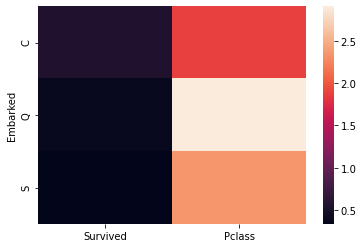

In [24]:
sns.heatmap(titanic_df[['Embarked','Survived','Pclass']].groupby(['Embarked']).mean())
plt.show()

탑승한 항구의 정보에 따른 생존률.

In [23]:
titanic_df[['Embarked','Survived','Pclass']].groupby(['Embarked']).mean()

,Survived,Pclass
Embarked,,
C,0.553571,1.886905
Q,0.389610,2.909091
S,0.336957,2.350932


 - C(Cherbourg)
 - Q(Queenstown)
 - S(Southampton)

##### -Cherboug에서 탄 사람이 평균적으로 티켓의 등급이 높고, 생존률이 높다.

## Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document

- numpy
- pandas
- seaborn
- matplotlib

### 무댓뽀로 하기 힘들다면?
1. 데이터를 돌아봅시다.
    - 각 데이터는 어떤 자료형을 가지고있나요?
    - 데이터에 **결측치**는 없나요? -> 있다면 어떻게 매꾸어줄까요?
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할수록 ex) Titanic Data에서 Survived 여부과 성별에는 상관관계가 있다!
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다른 여러 Technique를 써줘야 합니다.
    - `.groupby()` 를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()` 를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
test = pd.read_csv("./StudentsPerformance.csv")

In [5]:
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


성별 / 인종 / 부모의 교육수준 / lunch(뭔지모름, 점심 먹는지 인가) / 준비성 / 수학 / 읽기 / 쓰기

In [6]:
test.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
test.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
test.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


### 1. 성별에 따른 과목별 성적 비교

In [21]:
test[['gender','math score','reading score','writing score']].groupby(['gender']).mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


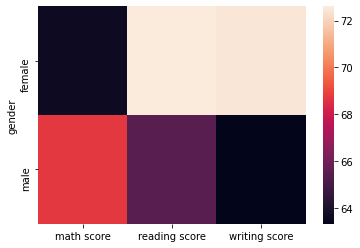

In [27]:
sns.heatmap(test[['gender','math score','reading score','writing score']].groupby(['gender']).mean())
plt.show()

- 수학점수는 일반적으로 남성이 높다
- 읽기, 쓰기는 여성이 일반적으로 높다.

### 2. 인종에 따른 과목별 성적 비교

In [28]:
test[['race/ethnicity','math score','reading score','writing score']].groupby(['race/ethnicity']).mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


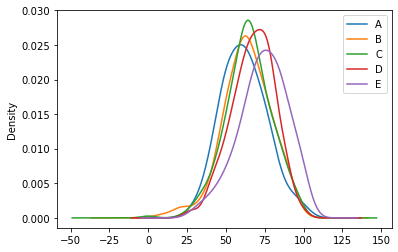

In [35]:
test['math score'][test['race/ethnicity'] == 'group A'].plot(kind = 'kde')
test['math score'][test['race/ethnicity'] == 'group B'].plot(kind = 'kde')
test['math score'][test['race/ethnicity'] == 'group C'].plot(kind = 'kde')
test['math score'][test['race/ethnicity'] == 'group D'].plot(kind = 'kde')
test['math score'][test['race/ethnicity'] == 'group E'].plot(kind = 'kde')
plt.legend(['A','B','C','D','E'])
plt.show()

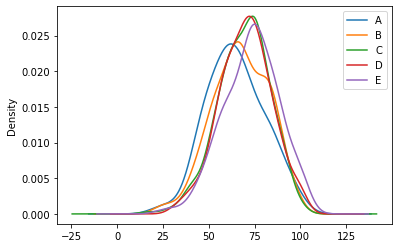

In [36]:
test['reading score'][test['race/ethnicity'] == 'group A'].plot(kind = 'kde')
test['reading score'][test['race/ethnicity'] == 'group B'].plot(kind = 'kde')
test['reading score'][test['race/ethnicity'] == 'group C'].plot(kind = 'kde')
test['reading score'][test['race/ethnicity'] == 'group D'].plot(kind = 'kde')
test['reading score'][test['race/ethnicity'] == 'group E'].plot(kind = 'kde')
plt.legend(['A','B','C','D','E'])
plt.show()

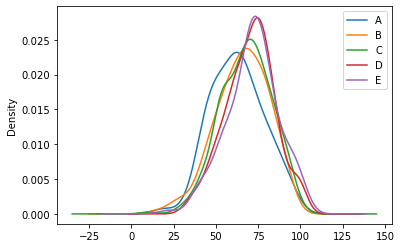

In [37]:
test['writing score'][test['race/ethnicity'] == 'group A'].plot(kind = 'kde')
test['writing score'][test['race/ethnicity'] == 'group B'].plot(kind = 'kde')
test['writing score'][test['race/ethnicity'] == 'group C'].plot(kind = 'kde')
test['writing score'][test['race/ethnicity'] == 'group D'].plot(kind = 'kde')
test['writing score'][test['race/ethnicity'] == 'group E'].plot(kind = 'kde')
plt.legend(['A','B','C','D','E'])
plt.show()

- E group이 대체적으로 성적이 좋다.
- A group이 대체적으로 성적이 좋지않다.

### 부모의 교육수준에따른 자녀의 성적비교

In [43]:
test[['parental level of education','reading score','writing score']].groupby(['parental level of education']).mean()

,reading score,writing score
parental level of education,,
associate's degree,70.927928,69.896396
bachelor's degree,73.000000,73.381356
high school,64.704082,62.448980
master's degree,75.372881,75.677966
some college,69.460177,68.840708
some high school,66.938547,64.888268


- 부모님의 학위가 높을수록 자녀들의 성적도 높다.